In [30]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

if os.path.exists("IBM.csv"):
    data = pd.read_csv("IBM.csv", index_col=0)
else: #download data if not found
    data = yf.Ticker("IBM")
    data = data.history(period="max")
    data.to_csv("IBM.csv")



# Convert the index to datetime with utc=True
data.index = pd.to_datetime(data.index, utc=True)

# Ensure the index is a DatetimeIndex
if not isinstance(data.index, pd.DatetimeIndex):
    data = data.set_index(pd.to_datetime(data.index, utc=True))

# Filter data to include only records from 2016 onwards
data = data[data.index.year >= 1998]

# reset the index (the index will be 0,1,2... rather than the date)
# data = data.reset_index()

#volume values are too lage
data['Volume'] = data['Volume']/10000000
data.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
data.tail(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-13 04:00:00+00:00,197.550003,198.100006,195.320007,196.699997,0.39933
2024-03-14 04:00:00+00:00,196.949997,197.750000,192.119995,193.429993,0.41096
2024-03-15 04:00:00+00:00,191.990005,193.057297,190.710007,191.070007,0.88242


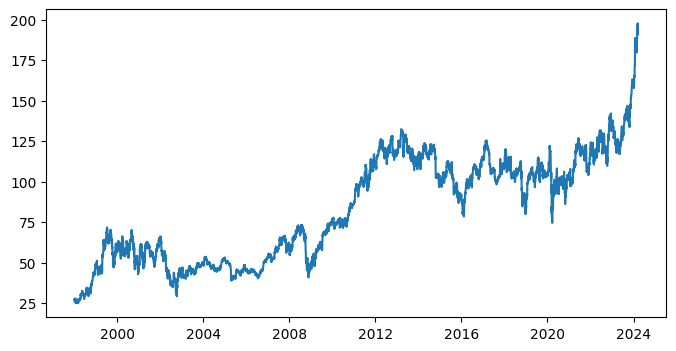

In [17]:
# # Plotting
plt.figure(figsize=(8,4))
plt.plot(data['Close'], label='Closing Price')

In [32]:
# Feature: Moving Averages

data['sma_20'] = data['Close'].rolling(window=20).mean() # 20-day Simple Moving Average
data['ema_12'] = data['Close'].ewm(span=12, adjust=False).mean() # 12-day Exponential Moving Average

# Feature: Rate of Change
data['roc'] = data['Close'].pct_change() * 100 # Percentage change in closing price

# Feature: Bollinger Bands
data['upper_band'], data['lower_band'] = data['Close'].rolling(window=20).mean() + 2 * data['Close'].rolling(window=20).std(), data['Close'].rolling(window=20).mean() - 2 * data['Close'].rolling(window=20).std()

# Feature: Historical Volatility
data['historical_volatility'] = data['Close'].pct_change().rolling(window=20).std() * (252 ** 0.5) # Annualized volatility

# Feature: Price Rate of Change
data['price_roc'] = data['Close'].pct_change()

# Feature Interaction: Volume-Price Interaction
data['volume_price_interaction'] = data['Volume'] * data['Close']

# Feature: Seasonality
data['month'] = data.index.month
data['quarter'] = data.index.quarter

# External Factor: Market Index Movement (Assuming 'market_index' is a separate dataset)
# data['market_index_movement'] = market_index['Close'].pct_change()

# Display the updated DataFrame
data = data.dropna()
data.head()


,Open,High,Low,Close,Volume,sma_20,ema_12,roc,upper_band,lower_band,historical_volatility,price_roc,volume_price_interaction,month,quarter
Date,,,,,,,,,,,,,,,
1998-03-03 05:00:00+00:00,25.811999,26.457300,25.763602,26.360504,0.830566,26.279396,26.542792,0.183891,27.435325,25.123466,0.208802,0.001839,21.894133,3,1
1998-03-04 05:00:00+00:00,26.328228,26.667009,25.553867,25.553867,0.629064,26.277131,26.390650,-3.060020,27.438834,25.115427,0.233258,-0.030600,16.075028,3,1
1998-03-05 05:00:00+00:00,25.860393,25.908792,25.376418,25.537743,1.121730,26.287746,26.259433,-0.063101,27.416240,25.159252,0.229842,-0.000631,28.646462,3,1
1998-03-06 05:00:00+00:00,25.586146,25.763603,25.328026,25.328026,1.088907,26.271774,26.116140,-0.821203,27.446518,25.097031,0.227099,-0.008212,27.579862,3,1
1998-03-09 05:00:00+00:00,25.069897,25.360282,24.747247,24.811777,1.352311,26.247575,25.915469,-2.038251,27.522630,24.972520,0.233382,-0.020383,33.553229,3,1


In [33]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()
data['Close Tomorrow'] = (data['Close'].shift(-1) > data['Close']).astype(int)* 2 - 1  # * 2 - 1 ==>   replaces 0 with -1

data.tail()

,Open,High,Low,Close,Volume,sma_20,ema_12,roc,upper_band,lower_band,historical_volatility,price_roc,volume_price_interaction,month,quarter,Open - Close,High - Low,Close Tomorrow
Date,,,,,,,,,,,,,,,,,,
2024-03-11 04:00:00+00:00,195.089996,195.380005,190.880005,191.729996,0.47251,187.696500,190.831847,-2.153611,197.419765,177.973234,0.234078,-0.021536,90.594340,3,1,3.360001,4.500000,1
2024-03-12 04:00:00+00:00,192.460007,199.179993,192.149994,197.779999,0.58801,188.277499,191.900794,3.155481,198.955947,177.599052,0.256837,0.031555,116.296617,3,1,-5.319992,7.029999,-1
2024-03-13 04:00:00+00:00,197.550003,198.100006,195.320007,196.699997,0.39933,188.927499,192.639133,-0.546062,200.007817,177.847182,0.251706,-0.005461,78.548210,3,1,0.850006,2.779999,-1
2024-03-14 04:00:00+00:00,196.949997,197.750000,192.119995,193.429993,0.41096,189.420499,192.760803,-1.662432,200.373822,178.467176,0.261424,-0.016624,79.491990,3,1,3.520004,5.630005,-1
2024-03-15 04:00:00+00:00,191.990005,193.057297,190.710007,191.070007,0.88242,189.630499,192.500681,-1.220072,200.538887,178.722111,0.260051,-0.012201,168.604015,3,1,0.919998,2.347290,-1


In [34]:
horizons = [2,5,60,250] #2days , week, ...

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["Close Tomorrow"]

    # Calculate sum of positive and negative values separately
    positive_sum_column = f"trend_Positive_{horizon}"
    negative_sum_column = f"trend_Negative_{horizon}"

    data[positive_sum_column] = data.shift(1).rolling(horizon).apply(lambda x: (x[x == 1]).sum(), raw=True)["Close Tomorrow"]
    data[negative_sum_column] = data.shift(1).rolling(horizon).apply(lambda x: (x[x == -1]).sum(), raw=True)["Close Tomorrow"]


# data = data.dropna(subset=data.columns[data.columns != "Tomorrow"])
data = data.dropna()


data.head(6)

,Open,High,Low,Close,Volume,sma_20,ema_12,roc,upper_band,lower_band,...,trend_Positive_5,trend_Negative_5,Close_Ratio_60,Trend_60,trend_Positive_60,trend_Negative_60,Close_Ratio_250,Trend_250,trend_Positive_250,trend_Negative_250
Date,,,,,,,,,,,,,,,,,,,,,
1999-03-01 05:00:00+00:00,44.031492,44.031492,42.894985,43.739250,1.003198,44.749609,44.841879,-0.810027,47.087358,42.411860,...,0.0,-5.0,0.951846,0.0,30.0,-30.0,1.235507,12.0,131.0,-119.0
1999-03-02 05:00:00+00:00,44.291267,44.404917,43.349592,43.576893,0.914581,44.596841,44.647266,-0.371194,46.812726,42.380955,...,0.0,-5.0,0.948265,0.0,30.0,-30.0,1.228419,12.0,131.0,-119.0
1999-03-03 05:00:00+00:00,43.771717,43.885371,42.878751,43.317116,0.809918,44.469997,44.442627,-0.596135,46.673281,42.266713,...,0.0,-5.0,0.942304,0.0,30.0,-30.0,1.218653,12.0,131.0,-119.0
1999-03-04 05:00:00+00:00,45.070568,45.979773,44.193835,44.421135,2.249005,44.417811,44.439321,2.548690,46.570746,42.264876,...,1.0,-4.0,0.965687,0.0,30.0,-30.0,1.247033,14.0,132.0,-118.0
1999-03-05 05:00:00+00:00,45.168015,46.483117,45.135546,46.336994,1.214009,44.535193,44.731270,4.312945,46.840381,42.230004,...,2.0,-3.0,1.006256,0.0,30.0,-30.0,1.297680,16.0,133.0,-117.0
1999-03-08 05:00:00+00:00,46.401920,46.759111,45.996028,46.466866,0.790755,44.705279,44.998285,0.280276,47.055317,42.355241,...,3.0,-2.0,1.008042,0.0,30.0,-30.0,1.298220,16.0,133.0,-117.0


In [54]:
#'trend_Positive_2','trend_Positive_5', 'trend_Positive_60', 'trend_Negative_2', 'trend_Negative_5', 'trend_Negative_60'
X = data[['Volume', 'Open - Close', 'High - Low', 'Close_Ratio_2', 'Close_Ratio_5', 'Close_Ratio_60', "Close_Ratio_250", 'Trend_2', 'Trend_5', 'Trend_60','trend_Positive_2','trend_Positive_5', 'trend_Positive_60', "sma_20", "ema_12", "roc", "upper_band", "lower_band", "historical_volatility", "price_roc", "volume_price_interaction"]]
# X = data[['Open', 'Close', 'High', 'Low','Volume', 'Open - Close', 'High - Low']]
# "sma_20", "ema_12", "roc", "upper_band", "lower_band", "historical_volatility", "price_roc", "volume_price_interaction"
# 'Open', 'Close', 'High', 'Low',
y = data['Close Tomorrow']

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #without random_state=44
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# X_train = X.iloc[0:-250]
# y_train = y.iloc[0:-250]

# X_test = X.iloc[-250:]
# y_test = y.iloc[-250:]


X_train.tail()

,Volume,Open - Close,High - Low,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Trend_2,Trend_5,Trend_60,...,trend_Positive_5,trend_Positive_60,sma_20,ema_12,roc,upper_band,lower_band,historical_volatility,price_roc,volume_price_interaction
Date,,,,,,,,,,,,,,,,,,,,,
2001-06-04 04:00:00+00:00,0.398756,-0.204748,0.997490,1.003311,1.003444,1.073049,1.056013,2.0,-1.0,6.0,...,2.0,33.0,60.636837,60.237962,0.664337,63.207092,58.066581,0.241989,0.006643,23.789932
2003-12-02 05:00:00+00:00,0.532602,-0.096163,0.512875,0.998570,1.004672,1.010009,1.082740,0.0,1.0,4.0,...,3.0,32.0,47.887724,48.067933,-0.285660,48.839543,46.935905,0.146637,-0.002857,25.822107
2010-04-19 04:00:00+00:00,1.187597,-1.077050,1.106157,1.006087,1.010886,1.041523,1.112355,0.0,1.0,2.0,...,3.0,31.0,75.211678,75.623157,1.224857,76.591584,73.831771,0.109005,0.012249,91.424429
2013-01-14 05:00:00+00:00,0.436412,0.122159,0.934508,0.995272,0.997886,1.001582,0.985225,0.0,-1.0,-10.0,...,2.0,25.0,118.085513,118.000263,-0.941133,120.034883,116.136143,0.141868,-0.009411,51.343764
2022-08-19 04:00:00+00:00,0.315580,0.354527,1.567356,0.997477,1.007470,1.026770,1.087512,0.0,3.0,10.0,...,4.0,35.0,122.917159,125.807970,-0.503362,130.089025,115.745293,0.112932,-0.005034,40.739131


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV #for selecting best parameter (K) for the model
from sklearn.metrics import accuracy_score, confusion_matrix

#using GridSearch to find the best parameter
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)
#cv=5 means that the model evaluation is done using 5-fold cross-validation during the grid search for finding the best parameter (n_neighbors) for the KNeighborsClassifier.

#fit the model
model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.63%
Test_data Accuracy: 0.53%

Confusion Matrix for Training Data:
[[1405 1034]
 [ 856 1747]]

Confusion Matrix for Test Data:
[[328 311]
 [283 339]]

Correct predictions for class "1" in Training Data: 1747
Correct predictions for class "-1" in Training Data: 1405

Correct predictions for class "1" in Test Data: 339
Correct predictions for class "-1" in Test Data: 328


In [55]:
from sklearn.svm import SVC
model2 = SVC()
model2 = model2.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model2.predict(X_train))
accuracy_test = accuracy_score(y_test, model2.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model2.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model2.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.52%
Test_data Accuracy: 0.49%

Confusion Matrix for Training Data:
[[  20 2419]
 [   8 2595]]

Confusion Matrix for Test Data:
[[  1 638]
 [  3 619]]

Correct predictions for class "1" in Training Data: 2595
Correct predictions for class "-1" in Training Data: 20

Correct predictions for class "1" in Test Data: 619
Correct predictions for class "-1" in Test Data: 1


In [56]:
#try to take off some features like Volume to increase the accurecy

from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100, min_samples_split=154, random_state=1)

#fit the model
model3.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model3.predict(X_train))
accuracy_test = accuracy_score(y_test, model3.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model3.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model3.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.75%
Test_data Accuracy: 0.51%

Confusion Matrix for Training Data:
[[1546  893]
 [ 390 2213]]

Confusion Matrix for Test Data:
[[230 409]
 [213 409]]

Correct predictions for class "1" in Training Data: 2213
Correct predictions for class "-1" in Training Data: 1546

Correct predictions for class "1" in Test Data: 409
Correct predictions for class "-1" in Test Data: 230


In [58]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.53%
Test_data Accuracy: 0.49%

Confusion Matrix for Training Data:
[[ 686 1753]
 [ 625 1978]]

Confusion Matrix for Test Data:
[[169 470]
 [175 447]]

Correct predictions for class "1" in Training Data: 1978
Correct predictions for class "-1" in Training Data: 686

Correct predictions for class "1" in Test Data: 447
Correct predictions for class "-1" in Test Data: 169


C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model = model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.52%
Test_data Accuracy: 0.49%

Confusion Matrix for Training Data:
[[ 802 1637]
 [ 763 1840]]

Confusion Matrix for Test Data:
[[207 432]
 [210 412]]

Correct predictions for class "1" in Training Data: 1840
Correct predictions for class "-1" in Training Data: 802

Correct predictions for class "1" in Test Data: 412
Correct predictions for class "-1" in Test Data: 207
